# Первичная обработка

In [36]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime

In [37]:
data = pd.read_excel('moex2.xlsx')

In [38]:
data.drop([0, 1], axis=0, inplace=True)

In [40]:
data.reset_index(drop=True, inplace=True)

In [41]:
data.rename(columns=data.iloc[0], inplace=True)

In [52]:
data

,BOARDID,SECID,TRADEDATE,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR,TRADINGSESSION,VOLUME
1,SNDX,IMOEX,02.03.2020,Индекс МосБиржи,Индекс МосБиржи,"2765,77","2829,47","2875,3","2714,36","1,44561E+11",0,0,2,"1,07077E+13",RUB,3871514068,3,NaN
2,SNDX,IMOEX,03.03.2020,Индекс МосБиржи,Индекс МосБиржи,"2821,37","2817,58","2844,04","2789,76","1,06771E+11",0,0,2,"1,0923E+13",RUB,3871514068,3,NaN
3,SNDX,IMOEX,04.03.2020,Индекс МосБиржи,Индекс МосБиржи,"2828,01","2799,18","2841,13","2779,85",82510191732,0,0,2,"1,09487E+13",RUB,3871514068,3,NaN
4,SNDX,IMOEX,05.03.2020,Индекс МосБиржи,Индекс МосБиржи,"2816,7","2852,42","2861,6","2800,43",80567170588,0,0,2,"1,09049E+13",RUB,3871514068,3,NaN
5,SNDX,IMOEX,06.03.2020,Индекс МосБиржи,Индекс МосБиржи,"2719,51","2773,53","2782,77","2680,06","1,39178E+11",0,0,2,"1,05286E+13",RUB,3871514068,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,SNDX,IMOEX,01.04.2024,Индекс МосБиржи,Индекс МосБиржи,"3363,29","3343,66","3367,34","3343,66","1,01013E+11",0,0,2,"5,9339E+12",RUB,1764312999,3,NaN
1018,SNDX,IMOEX,02.04.2024,Индекс МосБиржи,Индекс МосБиржи,"3371,29","3369,32","3375,69","3357,55",80210555236,0,0,2,"5,94802E+12",RUB,1764312999,3,NaN
1019,SNDX,IMOEX,03.04.2024,Индекс МосБиржи,Индекс МосБиржи,"3395,59","3381,95","3397,33","3376,63",86023975807,0,0,2,"5,99089E+12",RUB,1764312999,3,NaN
1020,SNDX,IMOEX,04.04.2024,Индекс МосБиржи,Индекс МосБиржи,"3407,57","3399,81","3409,62","3392,06",80827897829,0,0,2,"6,01201E+12",RUB,1764312999,3,NaN


In [42]:
data.drop([0], axis=0, inplace=True)

In [55]:
data.TRADEDATE = pd.to_datetime(data.TRADEDATE, format="%d.%m.%Y", exact=True)

In [57]:
data.set_index('TRADEDATE', inplace=True)

In [58]:
data.head()

,BOARDID,SECID,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR,TRADINGSESSION,VOLUME
TRADEDATE,,,,,,,,,,,,,,,,,
2020-03-02,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,"2765,77","2829,47","2875,3","2714,36","1,44561E+11",0,0,2,"1,07077E+13",RUB,3871514068,3,NaN
2020-03-03,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,"2821,37","2817,58","2844,04","2789,76","1,06771E+11",0,0,2,"1,0923E+13",RUB,3871514068,3,NaN
2020-03-04,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,"2828,01","2799,18","2841,13","2779,85",82510191732,0,0,2,"1,09487E+13",RUB,3871514068,3,NaN
2020-03-05,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,"2816,7","2852,42","2861,6","2800,43",80567170588,0,0,2,"1,09049E+13",RUB,3871514068,3,NaN
2020-03-06,SNDX,IMOEX,Индекс МосБиржи,Индекс МосБиржи,"2719,51","2773,53","2782,77","2680,06","1,39178E+11",0,0,2,"1,05286E+13",RUB,3871514068,3,NaN


#Анализ временного ряда



In [59]:
close = data['CLOSE'].str.replace(',', '.').astype(float)

<Axes: title={'center': 'Close value'}, xlabel='TRADEDATE'>

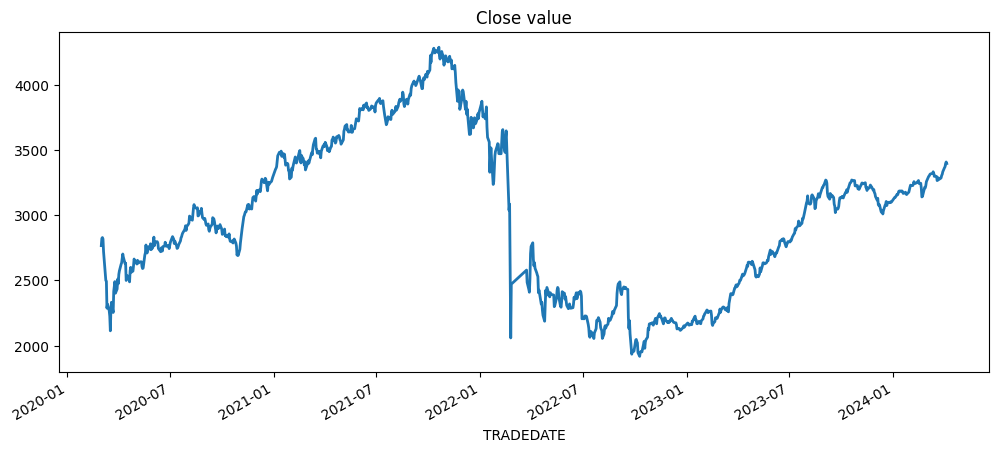

In [61]:
plt.figure(figsize=(12, 5))
plt.title("Close value")
close.plot()

In [79]:
from statsmodels.tsa.stattools import adfuller
def stationarity_test(data):
    test = adfuller(data, autolag='AIC')
    if test[0] > test[4]['5%']:
        return (0, test[1])
    else:
        return (1, test[1])

def print_stationarity_test(data):
    res = stationarity_test(data)
    if res[0]:
        print("p-value=%.2f" % res[1], ", ряд стационарен", sep="")
    else:
        print("p-value=%.2f" % res[1], ", ряд не стационарен", sep="")

In [80]:
print_stationarity_test(close)

p-value=0.60, ряд не стационарен


Ряд не стационарный.

In [63]:
close

TRADEDATE
2020-03-02    2765.77
2020-03-03    2821.37
2020-03-04    2828.01
2020-03-05    2816.70
2020-03-06    2719.51
               ...   
2024-04-01    3363.29
2024-04-02    3371.29
2024-04-03    3395.59
2024-04-04    3407.57
2024-04-05    3395.37
Name: CLOSE, Length: 1021, dtype: float64

In [71]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(x=close, model='additive', period=12, extrapolate_trend='freq') ## последние параметры - против NaN

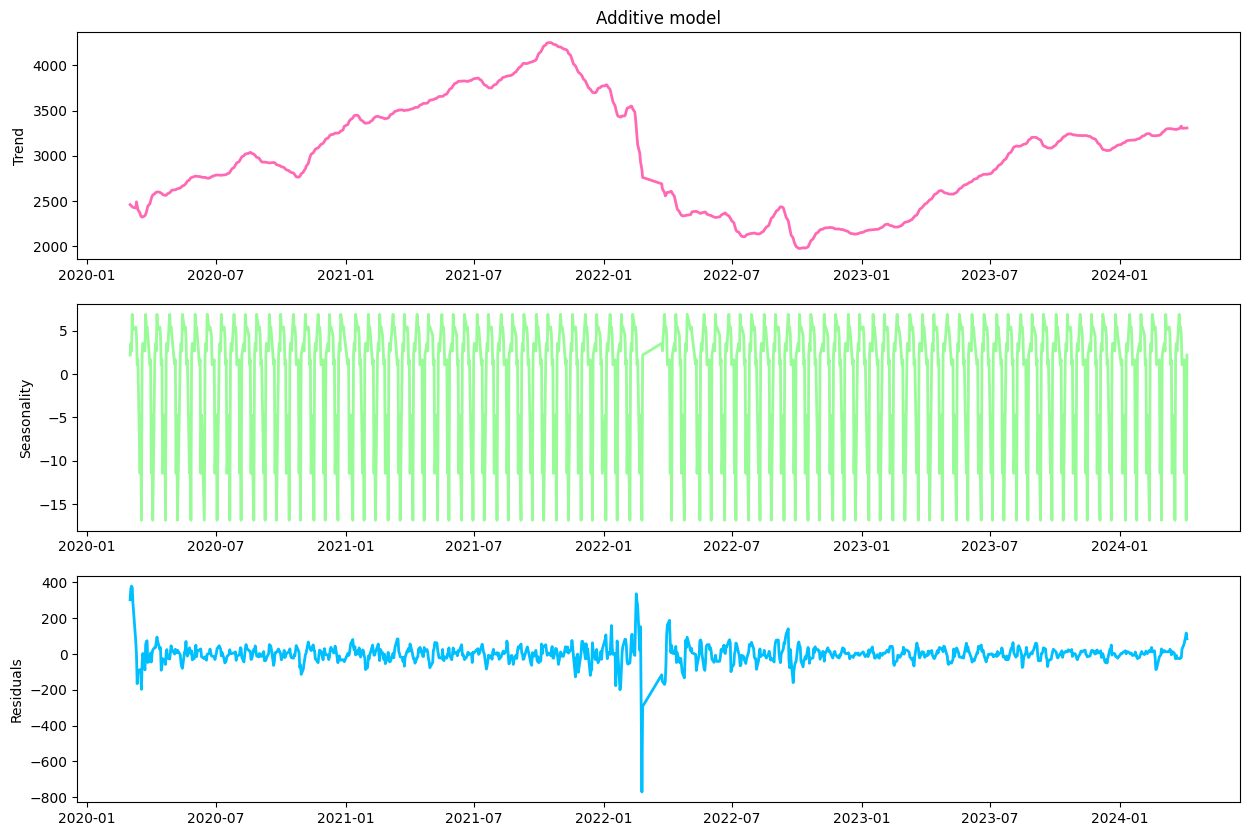

In [77]:
fig, axs = plt.subplots(3, figsize=(15, 10))

axs[0].plot(result_add.trend, c='hotpink')
axs[0].set_ylabel("Trend")
axs[0].set_title("Additive model")
axs[1].plot(result_add.seasonal, c='palegreen')
axs[1].set_ylabel("Seasonality")
axs[2].plot(result_add.resid, c='deepskyblue')
axs[2].set_ylabel("Residuals")
axs[0].set_title("Additive model")
plt.show()

In [81]:
dif = close.diff(periods=1).dropna()
print_stationarity_test(dif)

p-value=0.00, ряд стационарен


Ряд интегрированный порядка 1.

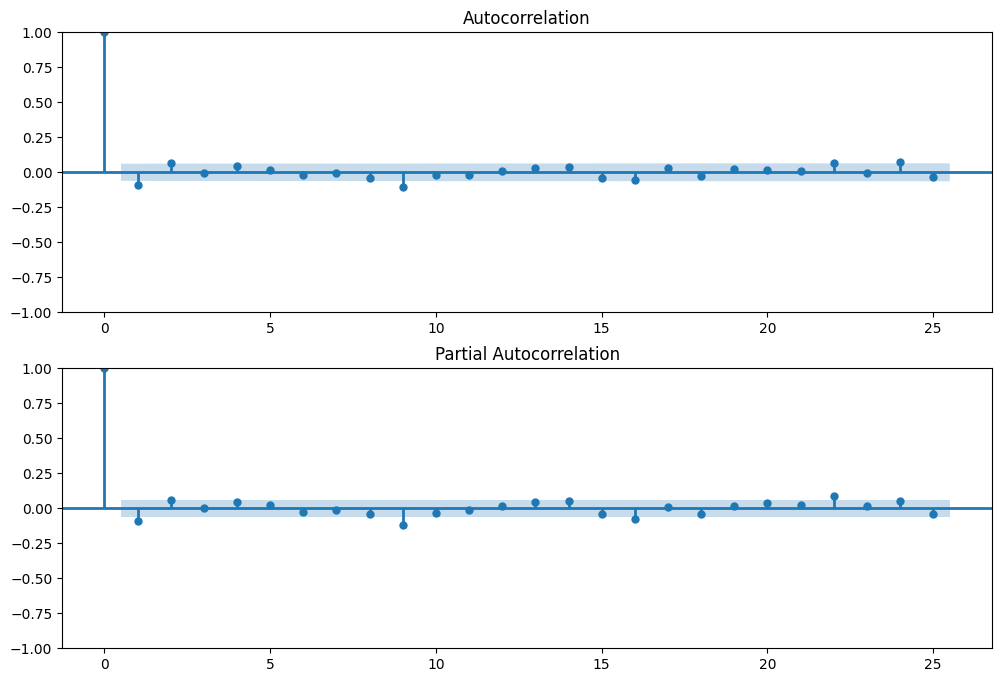

In [83]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dif.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dif, lags=25, ax=ax2)